# Project: Wrangle and Analyze Data

## <font color='blue'>Table of Contents</font>

* [Gather](#step0)
* [Assess](#step1)
* [Clean](#step3) 

## <font color='blue'>Analysis and Visualization</font>
* [Insight 1](#step0)
* [Insight 2](#step1)
* [Insight 3](#step3) 

### Import necessary packages for this project:

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import package to suppress warning messages:
import warnings
warnings.filterwarnings('ignore')

## Data Cleaning Process:

<a id='step0'></a>
## <font color='blue'>Gather</font>

There are 3 pieces of data that are needed to be downloaded:
- The WeRateDogs Twitter archive: 
    - Given file on hand <b>(twitter-archive-enhanced.csv)
- The tweet image predictions: 
    - Downloaded programmatically using the Requests library <b>(image_predictions.tsv)
- Each tweet's retweet count and favorite ("like") count at minimum: 
    - Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file <b>(file name: tweet_json.txt)

#### 1. Download twitter_archive_enhanced.csv:

In [3]:
# Download The WeRateDogs Twitter archive (twitter_archive_enhanced.csv):
tw_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# Inspect tw_archive:
tw_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2. Download image_predictions.tsv:

In [5]:
# Download The tweet image predictions (image_predictions.tsv):
image_pred_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_pred_response = requests.get(image_pred_url)

with open(os.path.join(os.getcwd(), 
                       image_pred_url.split('/')[-1]), mode = 'wb') as file:
    file.write(image_pred_response.content)

In [6]:
# Open image_predictions.tsv:
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

In [7]:
# Inspect image_pred:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Download each tweet's retweet count and favorite ("like") count
Note: The author decides to access project data without a twitter account as the author has not received access permission from Twitter yet and waiting could results in project's late submission for Udacity DAND program.

In [8]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

In [9]:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

tweet_ids = tw_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive

count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file

with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 834209720923721728
Fail
323: 8341

Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 798585098161549313
Fail
606: 798576900688019456
Fail
607: 7983

Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 759923798737051648
Fail
889: 759846353224826880
Fail
890: 759793422261743616
Fail
891: 7595

Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165: 723179728551723008
Fail
1166: 722974582966214656
Fail
1167: 722613351520608256
Fail
1168:

Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439: 696900204696625153
Fail
1440: 696894894812565505
Fail
1441: 696886256886657024
Fail
1442: 696877980375769088
Fail
1443:

Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713: 680494726643068929
Fail
1714: 680473011644985345
Fail
1715: 680440374763077632
Fail
1716: 680221482581123072
Fail
1717: 680206703334408192
Fail
1718:

Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987: 672884426393653248
Fail
1988: 672877615439593473
Fail
1989: 672834301050937345
Fail
1990: 672828477930868736
Fail
1991: 672640509974827008
Fail
1992:

Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261: 667550882905632768
Fail
2262: 667549055577362432
Fail
2263: 667546741521195010
Fail
2264: 667544320556335104
Fail
2265: 667538891197542400
Fail
2266:

In [10]:
# Create new dataframe with id, retweet_count, and favorite_count.

tweet_json = open('tweet-json.txt', 'r')
tw_count = pd.DataFrame(columns=['tweet_id', 'retweets_count', 'favorites_count'])

for line in tweet_json:
    tweet = json.loads(line)
    tw_count = tw_count.append({'tweet_id': tweet['id_str'], 'retweets_count': tweet['retweet_count'], 'favorites_count': tweet['favorite_count']}, ignore_index=True)
tweet_json.close()

# Inspect tw_count data:
tw_count

,tweet_id,retweets_count,favorites_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


<a id='step0'></a>
## <font color='blue'>Assess</font>

1. Assess tw_archive dataframe:

In [11]:
tw_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
# See lists of dog names:
tw_archive.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
Daisy         7
an            7
Bailey        7
Buddy         7
Toby          7
Bella         6
Rusty         6
Jax           6
Stanley       6
Dave          6
Jack          6
Leo           6
Oscar         6
Milo          6
Koda          6
Scout         6
Phil          5
           ... 
Bubba         1
Cilantro      1
Ben           1
Tycho         1
Emanuel       1
Cannon        1
Huck          1
light         1
Eugene        1
Tebow         1
Livvie        1
Willow        1
Mack          1
Colin         1
Karl          1
Antony        1
Theo          1
Jaspers       1
Spark         1
Fynn          1
Buckley       1
Ralphé        1
Katie         1
Ralphson      1
Brady         1
Rolf          1
Hall          1
Einstein      1
Superpup      1
Obi           1
Name: name, Length: 957,

In [14]:
# Check for retweet (duplicated text):
tw_archive[tw_archive.name == 'Logan']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None


In [15]:
# Check for many same dog names retweet (duplicated text):
tw_archive[tw_archive.name == 'Bailey']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
65,879492040517615616,NaN,NaN,2017-06-27 00:10:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. He thinks you should measure e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879492040...,12,10,Bailey,None,None,None,None
399,824796380199809024,NaN,NaN,2017-01-27 01:49:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bailey. She loves going...,7.950767e+17,4.196984e+09,2016-11-06 01:33:58 +0000,https://twitter.com/dog_rates/status/795076730...,11,10,Bailey,None,None,None,None
562,802600418706604034,NaN,NaN,2016-11-26 19:50:26 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Bailey. She has mastered the head tilt...,NaN,NaN,NaN,https://vine.co/v/5FwUWjYaW0Y,11,10,Bailey,None,None,None,None
626,795076730285391872,NaN,NaN,2016-11-06 01:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. She loves going down slides bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/795076730...,11,10,Bailey,None,None,None,None
650,792883833364439040,NaN,NaN,2016-10-31 00:20:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. She's rather h*ckin hype for H...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792883833...,12,10,Bailey,None,None,None,None
1510,691444869282295808,NaN,NaN,2016-01-25 02:17:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. She likes flowers. 12/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691444869...,12,10,Bailey,None,None,None,None
1908,674436901579923456,NaN,NaN,2015-12-09 03:54:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bailey. She plays with her food. Very chi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674436901...,9,10,Bailey,None,None,None,None


In [16]:
# See value counts of each rating_numerator:
tw_archive.rating_numerator.value_counts().sort_values(ascending = False)

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
121       1
80        1
204       1
24        1
143       1
99        1
45        1
27        1
17        1
1776      1
960       1
666       1
182       1
26        1
144       1
88        1
84        1
165       1
60        1
50        1
44        1
20        1
Name: rating_numerator, dtype: int64

In [17]:
# See value counts of each rating_denominator:
tw_archive.rating_denominator.value_counts().sort_values(ascending = False)

10     2333
11        3
50        3
80        2
20        2
7         1
2         1
16        1
40        1
0         1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
70        1
Name: rating_denominator, dtype: int64

In [18]:
# See record where rating_numerator is 1776:
tw_archive.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [19]:
# See records where dog name is not recorded (name = 'None')
pd.set_option('display.max_colwidth', -1)
tw_archive[tw_archive.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1",13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""n

In [20]:
# See records where dog name is an article (a, an, the) not actual dog name:
tw_archive.query('name == ["a", "an", "the"]')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13,10,a,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,"https://twitter.com/dog_rates/status/703041949650034688/photo/1,https://twitter.com/dog_rates/status/703041949650034688/photo/1",10,10,an,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11,10,a,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468511756288/photo/1,9,10,an,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.c

In [21]:
# See number of duplicates tweets (Retweets):
retweet = tw_archive[tw_archive.retweeted_status_id.notnull()]
retweet.text.count() # There are 181 duplicates (retweets in this table)

181

2. Assess image_predictions dataframe:

In [22]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [23]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
# See value_counts of p1:
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
malamute                     30 
cocker_spaniel               30 
French_bulldog               26 
miniature_pinscher           23 
Chesapeake_Bay_retriever     23 
seat_belt                    22 
Staffordshire_bullterrier    20 
Siberian_husky               20 
German_shepherd              20 
web_site                     19 
Cardigan                     19 
teddy                        18 
Eskimo_dog                   18 
Maltese_dog                  18 
Shetland_sheepdog            18 
beagle                       18 
Rottweiler                   17 
Shih-Tzu                     17 
Lakeland_terrier             17 
Italian_greyhound            16 
kuvasz                       16 
          

In [25]:
# See value_counts of p2:
image_predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                  92 
Cardigan                          73 
Chihuahua                         44 
Pomeranian                        42 
French_bulldog                    41 
Chesapeake_Bay_retriever          41 
toy_poodle                        37 
cocker_spaniel                    34 
miniature_poodle                  33 
Siberian_husky                    33 
beagle                            28 
Eskimo_dog                        27 
collie                            27 
Pembroke                          27 
kuvasz                            26 
Italian_greyhound                 22 
American_Staffordshire_terrier    21 
Pekinese                          21 
chow                              20 
Samoyed                           20 
toy_terrier                       20 
malinois                          20 
miniature_pinscher                20 
Norwegian_elkhound                19 
Boston_bull                       19 
Staffordshir

In [26]:
# See value_counts of p3:
image_predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
Pekinese                          29
toy_poodle                        29
Pomeranian                        29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

3. Assess tw_count dataframe:

In [27]:
tw_count

,tweet_id,retweets_count,favorites_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [28]:
tw_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id           2354 non-null object
retweets_count     2354 non-null object
favorites_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [29]:
# Check for null values in tweet_id column (if any):
tw_count[tw_count.tweet_id == 'None']

,tweet_id,retweets_count,favorites_count


In [30]:
# Check for null values in retweets_count column (if any):
tw_count[tw_count.retweets_count == 'None']

,tweet_id,retweets_count,favorites_count


In [31]:
# Check for null values in favorites_count column (if any):
tw_count[tw_count.favorites_count == 'None']

,tweet_id,retweets_count,favorites_count


### Summary of data cleaning issues:

#### Quality

#### `tw_archive` table:
- Partial missing values (NaN) in the 6 columns, <b>which can't be cleaned or imputed</b>:
    - in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls
- Errorneous data types in some columns:
    - tweet_id - should be <b>object (str)</b> not int64 
        - <b>***applies to image_predictions table as well***</b>
    - timestamp and retweeted_status_timestamp - should be <b>datetime</b> not object
    - in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id - should be <b>object (str)</b> not float64
- <b>source</b> column can be deleted as the author can access the original tweet via expanded_urls column
- Inaccurate rating_numerator and rating_denominator columns:
    - 1 record in rating_denominator is 0 which is not possible and when reading the actual text informs that the correct rating should be 13/10
    - New column named 'ratings' should be computed: rating_numerator divided by rating_denominator
- This data contains duplicates in the form of <b>Retweets</b>:
    - Twitter users can re-posting the tweet by typing "RT" at the beginning of the text that they want to share.
    - For Retweet texts: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns will not be empty.
- 5 unnecessary columns that can be dropped (because these columns do not add value to our analysis): 
    - in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp
- Problem in <b>text</b> column: 
    - URL attached at the end of text
- Problems in <b>name</b> column: 
    - Missing dog names are recorded as <b>None</b>: can be cleaned in some records
    - Invalid dog names: some are recorded as an article (a, an, the) and 'not'
    - Inaccurate dog names: some names are misspelled
    - Dog names that begin with lowercase letters are incorrect, most do not have name (except row index 992)

   *** After prior cleaning issues above, the author have spotted that 5 out of 6 Tweets with ratings more than 2 recorded the ratings incorrectly. 

#### `image_predictions` table:
- Invalid algorithm's prediction for all 3 predictions (p1, p2 and p3): <b>can't be cleaned</b>
    - Some does not contain actual dog's breed names (ex. paper_towl, orange, Appenzeller, tiger_shark, etc.)
- Inconsistent letter case in p1, p2 and p3:
    - Some names are capitalized while some are not
- Underscore ('_') are used instaed of space (' ') between words in column p1, p2 and p3

#### `tw_count` table:
- Errorneous data type in retweets_count and favorites_count columns:
    - Should be <b>int64</b> not object so that further analysis can be done

#### Tidiness:

#### `tw_archive` table:
- The last 4 columns <b>(i.e. doggo, floofer, pupper and puppo)</b> can be combined to only 1 column name <b>dog_stage</b> which contains the current stage of each dog.

#### `All tables`:
- All 3 dataframes can be joined together as only 1 table named 'master_clean'.
- Store the clean DataFrame in a CSV file called 'twitter_archive_master.csv'.

<a id='step0'></a>
## <font color='blue'>Clean</font>

##### Create a copy of all original dataframes:

In [32]:
archive_clean = tw_archive.copy()
image_clean = image_predictions.copy()
tw_count_clean = tw_count.copy()

### Quality
### tw_archive: cleaned into archive clean table

#### <b>#1: Errorneous data types in some columns:</b>
##### Define:
- tweet_id - should be changed to object (str) not int64
- timestamp and retweeted_status_timestamp - should be changed to datetime not object
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id - should be changed to object (str) not float64

##### Code:

In [33]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)

In [34]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)
archive_clean.retweeted_status_timestamp = pd.to_datetime(archive_clean.retweeted_status_timestamp)

In [35]:
archive_clean.in_reply_to_status_id = archive_clean.in_reply_to_status_id.astype(str)
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.astype(str)
archive_clean.retweeted_status_id = archive_clean.retweeted_status_id.astype(str)
archive_clean.retweeted_status_user_id = archive_clean.retweeted_status_user_id.astype(str)

##### Test:

In [36]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datet

#### <b>#2: source column can be deleted as the author can access the original tweet via expanded_urls column</b>
##### Define:
- Drop source column in archive_clean dataframe:

##### Code:

In [37]:
archive_clean = archive_clean.drop('source', axis = 1)

##### Test:

In [38]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](2), int64(2), object(12)
memory usage: 29

#### #3: Inaccurate rating_numerator and rating_denominator columns:
##### Define:
- Correct the record that has rating_denominator is 0 to the correct rating of 13/10
- Compute new column called 'ratings' (rating_numerator divided by rating_denominator) and add this new column to archive_clean dataframe

##### Code:

- Correct the record that has rating_denominator is 0 to the correct rating of 13/10

In [39]:
# See the record that has rating_denominator of 0:
archive_clean[archive_clean.rating_denominator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.35245984029e+17,26259576.0,2017-02-24 21:54:03,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",nan,nan,NaT,NaN,960,0,None,None,None,None,None


In [40]:
# Change rating_numerator and rating_denominator of row index 313 to 13 and 10 respectively
archive_clean.rating_numerator[archive_clean.index == 313] = 13
archive_clean.rating_denominator[archive_clean.index == 313] = 10

- Compute new column called 'ratings' (rating_numerator divided by rating_denominator) and then drop rating_numerator and rating_denominator columns from archive_clean

In [41]:
# Compute new column called 'ratings' (rating_numerator divided by rating_denominator) 
archive_clean['ratings'] = archive_clean.rating_numerator / archive_clean.rating_denominator

In [42]:
# Drop rating_numerator and rating_denominator columns from archive_clean
archive_clean.drop(['rating_numerator', 'rating_denominator'], axis = 1, inplace = True)

##### Test:

In [43]:
# New column 'ratings' should be in archive_clean 
# rating_numerator and rating_denominator columns should be no longer in archive_clean:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
ratings                       2356 non-null float64
dtypes: datetime64[ns](2), float64(1), object(12)
memory usage: 276.2+ KB


In [44]:
# ratings in index 313 should be 1.3:
archive_clean[archive_clean.index == 313]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,ratings
313,835246439529840640,8.35245984029e+17,26259576.0,2017-02-24 21:54:03,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",nan,nan,NaT,NaN,None,None,None,None,None,1.3


#### #4: Data contains duplicates in the form of Retweets:
##### Define:
- Remove all Retweets in archive_clean

##### Code:

In [45]:
# Select only non retweet records: should be 2,356 - 181 = 2,175 records
archive_clean = archive_clean[archive_clean.retweeted_status_id == "nan"]

##### Test:

In [46]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         2175 non-null object
in_reply_to_user_id           2175 non-null object
timestamp                     2175 non-null datetime64[ns]
text                          2175 non-null object
retweeted_status_id           2175 non-null object
retweeted_status_user_id      2175 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
ratings                       2175 non-null float64
dtypes: datetime64[ns](2), float64(1), object(12)
memory usage: 271.9+ KB


#### #5: Five unnecessary columns that can be dropped:
##### Define:
- Drop these 5 columns from archive_clean:
    - in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp

##### Code:

In [47]:
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], 
                   axis = 1, inplace = True)

##### Test:

In [48]:
# The most updated archive_clean should have only 12 columns:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id         2175 non-null object
timestamp        2175 non-null datetime64[ns]
text             2175 non-null object
expanded_urls    2117 non-null object
name             2175 non-null object
doggo            2175 non-null object
floofer          2175 non-null object
pupper           2175 non-null object
puppo            2175 non-null object
ratings          2175 non-null float64
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 186.9+ KB


#### #6: Problem in <b>text</b> column: URL attached at the end of text
##### Define:
- Extract URL(s) from text column to a new column called 'short_url'
- Drop expanded_urls column from archive_clean
- Drop NaN records in short_url column

##### Code:

In [49]:
# Count number of texts that have URL at the end of the text:
archive_clean[archive_clean.text.str.contains('.*(https://.+).*')] 

### 2117 out of 2175 records have URL(s) at the end of the text.

,tweet_id,timestamp,text,expanded_urls,name,doggo,floofer,pupper,puppo,ratings
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,None,None,None,None,1.2
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,None,None,None,None,None,1.3
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",Jax,None,None,None,None,1.3
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",None,None,None,None,None,1.3
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,Zoey,None,None,None,None,1.3
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,Cassie,doggo,None,None,None,1.4


In [50]:
# Extract URL(s) from text column to a new column called 'short_url':
archive_clean['short_url'] = archive_clean.text.str.extract('(https://.+)', expand = True)

In [51]:
# Drop expanded_urls column from archive_clean:
archive_clean.drop('expanded_urls', axis = 1, inplace = True)

In [52]:
# Drop NaN records in short_url column:
archive_clean = archive_clean[archive_clean.short_url.notnull()]

##### Test:

In [53]:
# There should be new column called 'short_url', column expanded_urls should be gone and only 2,117 records remains
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id     2117 non-null object
timestamp    2117 non-null datetime64[ns]
text         2117 non-null object
name         2117 non-null object
doggo        2117 non-null object
floofer      2117 non-null object
pupper       2117 non-null object
puppo        2117 non-null object
ratings      2117 non-null float64
short_url    2117 non-null object
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 181.9+ KB


#### #7: Problem in <b>name</b> column: 
#### some missing dog names (recorded as 'None') can be cleaned, invalid and inaccurate dog names
##### Define:
- Use <b>regex</b> to extract actual dog names that are after keywords like 'named' and correct misspelled dog names like 'Johm' and 'Hemry'
- Change any remaining dog names that are still recorded as <b>a, an, the, not</b> as 'None' if in the text do not include any dog names.
- Use <b>regex</b> to extract actual dog names that are after keywords like 'name' or 'names' and is/are, correct any dog names that does not match the regex pattern.
- Change dog names that begins with lowercase letter to 'None' (except row index 992)

##### Code:

1. Extract actual dog names that are after keywords like 'named' and clean it

In [54]:
# Check how many records have actual dog names that are after keywords like 'named'
# 23 records have actual dog names after keyword 'named':
after_named = archive_clean[archive_clean.text.str.contains('.*named.*')]
after_named

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,ratings,short_url
1853,675706639471788032,2015-12-12 15:59:51,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,a,None,None,None,None,1.0,https://t.co/7E0AiJXPmI
1955,673636718965334016,2015-12-06 22:54:44,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,a,None,None,None,None,1.0,https://t.co/gKlLpNzIl3
2034,671743150407421952,2015-12-01 17:30:22,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,a,None,None,None,None,1.1,https://t.co/2IslQ8ZSc7
2066,671147085991960577,2015-11-30 02:01:49,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,a,None,None,None,None,0.9,https://t.co/34OhVhMkVr
2116,670427002554466305,2015-11-28 02:20:27,This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,a,None,None,None,None,0.9,https://t.co/CtuJoLHiDo
2125,670361874861563904,2015-11-27 22:01:40,This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,a,None,None,None,None,0.9,https://t.co/98ZBi6o4dj
2128,670303360680108032,2015-11-27 18:09:09,This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,a,None,None,None,None,0.9,https://t.co/yV3Qgjh8iN
2146,669923323644657664,2015-11-26 16:59:01,This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,a,None,None,None,None,1.0,https://t.co/6GUGO7azNX
2161,669564461267722241,2015-11-25 17:13:02,This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,a,None,None,None,None,1.0,https://t.co/eCRdwouKCl
2166,669363888236994561,2015-11-25 03:56:01,Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend https://t.co/jPkd7hhX7m,None,None,None,None,None,1.0,https://t.co/jPkd7hhX7m


In [55]:
# Import package for regex: re
import re

In [56]:
# Write for loop to extract series of correct dog names after the word 'named':
name_list = []

for text in after_named.text:
    phase = re.compile('(named (.*\.{1}))')
    search_name = phase.search(text)
    dog_name_phase = search_name.group(2)
    correct_name = dog_name_phase.split('.')[0]
    name_list.append(correct_name)

result = pd.Series(name_list)
result

0     Wylie        
1     Kip          
2     Jacob (Yacōb)
3     Rufus        
4     Spork        
5     Cherokee     
6     Hemry        
7     Alphred      
8     Alfredo      
9     Zeus         
10    Leroi        
11    Berta        
12    Chuk         
13    Guss         
14    Alfonso      
15    Cheryl       
16    Jessiga      
17    Klint        
18    Tickles      
19    Kohl         
20    Pepe         
21    Octaviath    
22    Johm         
dtype: object

In [57]:
# Assign result back to after_name
after_named.name = result.values 
after_named

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,ratings,short_url
1853,675706639471788032,2015-12-12 15:59:51,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,Wylie,None,None,None,None,1.0,https://t.co/7E0AiJXPmI
1955,673636718965334016,2015-12-06 22:54:44,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,Kip,None,None,None,None,1.0,https://t.co/gKlLpNzIl3
2034,671743150407421952,2015-12-01 17:30:22,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,Jacob (Yacōb),None,None,None,None,1.1,https://t.co/2IslQ8ZSc7
2066,671147085991960577,2015-11-30 02:01:49,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,Rufus,None,None,None,None,0.9,https://t.co/34OhVhMkVr
2116,670427002554466305,2015-11-28 02:20:27,This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,Spork,None,None,None,None,0.9,https://t.co/CtuJoLHiDo
2125,670361874861563904,2015-11-27 22:01:40,This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,Cherokee,None,None,None,None,0.9,https://t.co/98ZBi6o4dj
2128,670303360680108032,2015-11-27 18:09:09,This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,Hemry,None,None,None,None,0.9,https://t.co/yV3Qgjh8iN
2146,669923323644657664,2015-11-26 16:59:01,This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,Alphred,None,None,None,None,1.0,https://t.co/6GUGO7azNX
2161,669564461267722241,2015-11-25 17:13:02,This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,Alfredo,None,None,None,None,1.0,https://t.co/eCRdwouKCl
2166,669363888236994561,2015-11-25 03:56:01,Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend https://t.co/jPkd7hhX7m,Zeus,None,None,None,None,1.0,https://t.co/jPkd7hhX7m


In [58]:
# Correct misspelled dog names: 'Johm' and 'Hemry'
after_named.name[after_named.name == 'Johm'] = 'John'
after_named.name[after_named.name == 'Hemry'] = 'Henry'

In [59]:
# Assign correct dog names in after_named back to archive_clean:
archive_clean.name[after_named.index] = after_named.name

2. Change any remaining dog names that are still recorded as a, an, the, not as 'None' if in the text do not include any dog names

In [60]:
# Inspect data:
article_dog_names = archive_clean[archive_clean.name.isin(['a', 'an', 'the', 'not'])]
article_dog_names

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,ratings,short_url
56,881536004380872706,2017-07-02 15:32:16,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a,None,None,pupper,None,1.4,https://t.co/ghXBIIeQZF
335,832645525019123713,2017-02-17 17:38:57,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,not,None,None,None,None,1.0,https://t.co/dp5h9bCwU7
649,792913359805018113,2016-10-31 02:17:31,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a,None,None,None,None,1.3,https://t.co/LRyMrU7Wfq
801,772581559778025472,2016-09-04 23:46:12,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,a,None,None,None,None,1.0,https://t.co/8lpAGaZRFn
988,748977405889503236,2016-07-01 20:31:43,What jokester sent in a pic without a dog in it? This is not @rock_rates. This is @dog_rates. Thank you ...10/10 https://t.co/nDPaYHrtNX,not,None,None,None,None,1.0,https://t.co/nDPaYHrtNX
1002,747885874273214464,2016-06-28 20:14:22,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,a,None,None,None,None,0.8,https://t.co/TGenMeXreW
1004,747816857231626240,2016-06-28 15:40:07,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,a,None,None,None,None,0.4,https://t.co/L3U0j14N5R
1017,746872823977771008,2016-06-26 01:08:52,This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,a,None,None,None,None,1.1,https://t.co/9e48aPrBm2
1025,746369468511756288,2016-06-24 15:48:42,This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt,an,None,None,None,None,0.9,https://t.co/5qpBTTpgUt
1049,743222593470234624,2016-06-15 23:24:09,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,a,None,None,pupper,None,1.2,https://t.co/xOBKCdpzaa


In [61]:
# Change all dog names in article_dog_names to 'None':
article_dog_names.name = 'None'

Since index 2287, the text actually inform that the real dog name is 'Daryl', so we will change it accordingly.

In [62]:
article_dog_names.name[article_dog_names.index == 2287] = 'Daryl'

In [63]:
# Assign correct dog names in article_dog_names back to archive_clean:
archive_clean.name[article_dog_names.index] = article_dog_names.name

3. Extract actual dog names that are after keywords like 'name' or 'names' and is/are then clean it

In [64]:
# Inspect data that have dog names that are after keywords like 'name' or 'names' and is/are: 8 records
after_is_are = archive_clean[((archive_clean.text.str.contains('.+(names? (is|are|to) (.+)).+')) & (archive_clean.name.isin(['None', 'my'])))]
after_is_are

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,ratings,short_url
35,885518971528720385,2017-07-13 15:19:09,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,None,None,None,None,None,1.4,https://t.co/gzLHboL7Sk
149,863079547188785154,2017-05-12 17:12:53,"Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",None,None,None,None,None,1.4,https://t.co/lVU5GyNFen
168,859607811541651456,2017-05-03 03:17:27,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,None,None,None,None,puppo,1.3,https://t.co/BArWupFAn0
852,765395769549590528,2016-08-16 03:52:26,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,my,None,None,None,None,1.3,https://t.co/ep1NkYoiwB
1678,682047327939461121,2015-12-30 03:55:29,We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,None,None,None,None,None,1.0,https://t.co/fZc7MixeeT
1734,679736210798047232,2015-12-23 18:51:56,This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,None,None,None,None,None,0.9,https://t.co/iazoiNUviP
2267,667524857454854144,2015-11-20 02:08:22,Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,None,None,None,None,None,1.2,https://t.co/seESNzgsdm
2306,666835007768551424,2015-11-18 04:27:09,These are Peruvian Feldspars. Their names are Cupit and Prencer. Both resemble Rand Paul. Sick outfits 10/10 &amp; 10/10 https://t.co/ZnEMHBsAs1,None,None,None,None,None,1.0,https://t.co/ZnEMHBsAs1


In [65]:
# Write for loop to extract series of correct dog names after the word 'name + is/are':
list2 = []

for t in after_is_are.text:
    phase2 = re.compile('.+(names? (is|are|to) (.+)).+')
    search_name2 = phase2.search(t)
    dog_name_phase2 = search_name2.group(3)
    correct_name2 = dog_name_phase2.split('.')[0]
    
    list2.append(correct_name2)

result2 = pd.Series(list2)
result2

# Manually edit index 1, 2 and 5 (The pattern did not correctly match the correct dog names) in result2:
result2[result2.index == 1] = 'Pipsy'
result2[result2.index == 2] = 'Zoey'
result2[result2.index == 5] = 'Sabertooth'

result2

0    Howard           
1    Pipsy            
2    Zoey             
3    Zoey             
4    Thea             
5    Sabertooth       
6    Big Jumpy Rat    
7    Cupit and Prencer
dtype: object

In [66]:
# Assign result2 back to after_name
after_is_are.name = result2.values 
after_is_are

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,ratings,short_url
35,885518971528720385,2017-07-13 15:19:09,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,Howard,None,None,None,None,1.4,https://t.co/gzLHboL7Sk
149,863079547188785154,2017-05-12 17:12:53,"Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",Pipsy,None,None,None,None,1.4,https://t.co/lVU5GyNFen
168,859607811541651456,2017-05-03 03:17:27,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,Zoey,None,None,None,puppo,1.3,https://t.co/BArWupFAn0
852,765395769549590528,2016-08-16 03:52:26,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,Zoey,None,None,None,None,1.3,https://t.co/ep1NkYoiwB
1678,682047327939461121,2015-12-30 03:55:29,We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,Thea,None,None,None,None,1.0,https://t.co/fZc7MixeeT
1734,679736210798047232,2015-12-23 18:51:56,This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,Sabertooth,None,None,None,None,0.9,https://t.co/iazoiNUviP
2267,667524857454854144,2015-11-20 02:08:22,Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,Big Jumpy Rat,None,None,None,None,1.2,https://t.co/seESNzgsdm
2306,666835007768551424,2015-11-18 04:27:09,These are Peruvian Feldspars. Their names are Cupit and Prencer. Both resemble Rand Paul. Sick outfits 10/10 &amp; 10/10 https://t.co/ZnEMHBsAs1,Cupit and Prencer,None,None,None,None,1.0,https://t.co/ZnEMHBsAs1


In [67]:
# Assign correct dog names in article_dog_names back to archive_clean:
archive_clean.name[after_is_are.index] = after_is_are.name

4. Change dog names that begins with lowercase letter to 'None' (except row index 992)

In [68]:
# Inspect data: 32 records have dog names begin with lowercase letters
archive_clean[archive_clean.name == archive_clean.name.str.lower()]

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,ratings,short_url
22,887517139158093824,2017-07-19 03:39:09,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such,None,None,None,None,1.4,https://t.co/20VrLAA8ba
169,859196978902773760,2017-05-02 00:04:57,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite,None,None,None,None,1.2,https://t.co/g2nSyGenG9
193,855459453768019968,2017-04-21 16:33:22,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite,None,None,None,None,1.2,https://t.co/Xc7uj1C64x
369,828650029636317184,2017-02-06 17:02:17,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one,None,None,None,None,1.4,https://t.co/bZ4axuH6OK
542,806219024703037440,2016-12-06 19:29:28,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,incredibly,None,None,None,None,1.1,https://t.co/IZidSrBvhi
819,770655142660169732,2016-08-30 16:11:18,We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d,very,None,None,None,None,1.1,https://t.co/qlUDuPoE3d
924,755206590534418437,2016-07-19 01:04:16,This is one of the most inspirational stories I've ever come across. I have no words. 14/10 for both doggo and owner https://t.co/I5ld3eKD5k,one,doggo,None,None,None,1.4,https://t.co/I5ld3eKD5k
992,748692773788876800,2016-07-01 01:40:41,That is Quizno. This is his beach. He does not tolerate human shenanigans on his beach. 10/10 reclaim ur land doggo https://t.co/vdr7DaRSa7,his,doggo,None,None,None,1.0,https://t.co/vdr7DaRSa7
993,748575535303884801,2016-06-30 17:54:50,This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10 https://t.co/z5bAdtn9kd,one,None,None,None,None,0.6,https://t.co/z5bAdtn9kd
1031,745422732645535745,2016-06-22 01:06:43,We only rate dogs. Pls stop sending in non-canines like this Jamaican Flop Seal. This is very very frustrating. 9/10 https://t.co/nc53zEN0hZ,very,None,None,None,None,0.9,https://t.co/nc53zEN0hZ


In [69]:
# Change all dog names that begin with lowercase letters to 'None'
archive_clean.name[archive_clean.name == archive_clean.name.str.lower()] = 'None'

In [70]:
# Change dog's name in index 992 to 'Quizno':
archive_clean.name[archive_clean.index == 992] = 'Quizno'

##### Test:

In [71]:
# Dog names for text that dog names are after the word 'named' should be valid:
archive_clean[archive_clean.text.str.contains('.*named.*')]

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,ratings,short_url
1853,675706639471788032,2015-12-12 15:59:51,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,Wylie,None,None,None,None,1.0,https://t.co/7E0AiJXPmI
1955,673636718965334016,2015-12-06 22:54:44,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,Kip,None,None,None,None,1.0,https://t.co/gKlLpNzIl3
2034,671743150407421952,2015-12-01 17:30:22,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,Jacob (Yacōb),None,None,None,None,1.1,https://t.co/2IslQ8ZSc7
2066,671147085991960577,2015-11-30 02:01:49,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,Rufus,None,None,None,None,0.9,https://t.co/34OhVhMkVr
2116,670427002554466305,2015-11-28 02:20:27,This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,Spork,None,None,None,None,0.9,https://t.co/CtuJoLHiDo
2125,670361874861563904,2015-11-27 22:01:40,This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,Cherokee,None,None,None,None,0.9,https://t.co/98ZBi6o4dj
2128,670303360680108032,2015-11-27 18:09:09,This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,Henry,None,None,None,None,0.9,https://t.co/yV3Qgjh8iN
2146,669923323644657664,2015-11-26 16:59:01,This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,Alphred,None,None,None,None,1.0,https://t.co/6GUGO7azNX
2161,669564461267722241,2015-11-25 17:13:02,This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,Alfredo,None,None,None,None,1.0,https://t.co/eCRdwouKCl
2166,669363888236994561,2015-11-25 03:56:01,Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend https://t.co/jPkd7hhX7m,Zeus,None,None,None,None,1.0,https://t.co/jPkd7hhX7m


In [72]:
# Dog names for text that dog names are incorrectly identified as an article and the word 'not' should be 0:
archive_clean[archive_clean.name.isin(['a', 'an', 'the', 'not'])]

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,ratings,short_url


In [73]:
# Dog names for text that dog names are after the word 'name or names + is/are' should be 0:
archive_clean[((archive_clean.text.str.contains('.+(names? (is|are|to) (.+)).+')) & (archive_clean.name.isin(['None', 'my'])))]

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,ratings,short_url


In [74]:
# Dog names that begins with lowercase letters should be 0:
archive_clean[archive_clean.name == archive_clean.name.str.lower()]

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,ratings,short_url


In [75]:
# Dog named 'Quizno' is correctly fixed:
archive_clean[archive_clean.name == 'Quizno']

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,ratings,short_url
992,748692773788876800,2016-07-01 01:40:41,That is Quizno. This is his beach. He does not tolerate human shenanigans on his beach. 10/10 reclaim ur land doggo https://t.co/vdr7DaRSa7,Quizno,doggo,None,None,None,1.0,https://t.co/vdr7DaRSa7


#### #8: Additional cleaning for text column: delete html tags at the end of each text
##### Define:
- In text column: split html tags from text and keep only twitter text

##### Code:

In [76]:
archive_clean.text = archive_clean.text.str.split(pat = 'https.+', expand = True)

##### Test:

In [77]:
# There should be no https in text column:
archive_clean

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,ratings,short_url
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,Phineas,None,None,None,None,1.3,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",Tilly,None,None,None,None,1.3,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,Archie,None,None,None,None,1.2,https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,Darla,None,None,None,None,1.3,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",Franklin,None,None,None,None,1.2,https://t.co/AtUZn91f7f
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,None,None,None,None,None,1.3,https://t.co/kQ04fDDRmh
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\n,Jax,None,None,None,None,1.3,https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10,None,None,None,None,None,1.3,https://t.co/v0nONBcwxq
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek,Zoey,None,None,None,None,1.3,https://t.co/9TwLuAGH0b
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate,Cassie,doggo,None,None,None,1.4,https://t.co/t1bfwz5S2A


<b>*** Additional cleaning for ratings column:</b>

##### Define:
Correct the ratings in 5 out of 6 Tweets with ratings more than 2, drop irrelevant dog Tweets (if any)

##### Code:

In [78]:
# Inspect tweets that have ratings more than 2:
archive_clean[archive_clean.ratings > 2]

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,ratings,short_url
516,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\n,Sam,None,None,None,None,3.428571,https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
695,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",Logan,None,None,None,None,7.500000,https://t.co/yBO5wuqaPS
763,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,Sophie,None,None,pupper,None,2.700000,https://t.co/QFaUiIHxHq
979,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af. 1776/10,Atticus,None,None,None,None,177.600000,https://t.co/GRXwMxLBkh
1712,680494726643068929,2015-12-25 21:06:00,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,None,None,None,None,None,2.600000,https://t.co/eNm2S6p9BD
2074,670842764863651840,2015-11-29 05:52:33,After so many requests... here you go.\n\nGood dogg. 420/10,None,None,None,None,None,42.000000,https://t.co/yfAAo1gdeY


In above data, we can see the following issues:
1. The ratings for index 516 should be 0 as the context in the text column '24/7' is not ratings.
2. Ratings that have rating numerator as decimals had computed the ratings incorrectly.
3. Index 2074 should be dropped from archive_clean as the tweet and tweet picture is not dog, it is actually the American rapper named 'Snoop Dogg'.

In [79]:
# 1. Fix the ratings for index 516 to 0:
archive_clean.ratings[archive_clean.index == 516] = 0

In [80]:
# 2. Fix 3 ratings that have rating numerator as decimals:
archive_clean.ratings[archive_clean.index == 695] = 0.975
archive_clean.ratings[archive_clean.index == 763] = 1.27
archive_clean.ratings[archive_clean.index == 1712] = 1.26

In [81]:
# 3. Drop index 2074 from archive_clean:
archive_clean.drop(index = 2074, axis = 0, inplace = True)

##### Test:

In [82]:
# See index 516 data: 
archive_clean[archive_clean.index == 516]

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,ratings,short_url
516,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\n,Sam,None,None,None,None,0.0,https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


In [83]:
# See index 695, 763, 1712 data:
archive_clean[archive_clean.index.isin([695, 763, 1712])]

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,ratings,short_url
695,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",Logan,None,None,None,None,0.975,https://t.co/yBO5wuqaPS
763,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,Sophie,None,None,pupper,None,1.270,https://t.co/QFaUiIHxHq
1712,680494726643068929,2015-12-25 21:06:00,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,None,None,None,None,None,1.260,https://t.co/eNm2S6p9BD


In [84]:
# There should be only 1 record that has ratings more than 2: 
archive_clean[archive_clean.ratings > 2]

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,ratings,short_url
979,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af. 1776/10,Atticus,None,None,None,None,177.6,https://t.co/GRXwMxLBkh


### image_predictions: cleaned into image_clean table

#### #9: Invalid data type for tweet_id:
##### Define:
- Convert tweet_id data type into object:

##### Code:

In [85]:
image_clean.tweet_id = image_clean.tweet_id.astype(str)

##### Test:

In [86]:
# tweet_id data type should be object:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### #10: Inconsistent letter case in p1, p2 and p3
##### Define:
- Change all letters in p1, p2 and p3 into lowercase

##### Code:

In [87]:
# Write a function to convert all information in p1, p2 and p3 to lowercase:
def str_lower(col):
    return col.str.lower()

In [88]:
# Change all information in p1, p2 and p3 to lowercase letters:
image_clean.p1 = str_lower(image_clean.p1)
image_clean.p2 = str_lower(image_clean.p2)
image_clean.p3 = str_lower(image_clean.p3)

##### Test:

In [89]:
# See if all information in p1, p2 and p3 are lowercase:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### #11: Underscore ('_') are used instaed of space (' ') between words in column p1, p2 and p3
##### Define:
- Replace underscore to space between words

##### Code:

In [90]:
image_clean.p1 = image_clean.p1.str.replace('_', ' ')
image_clean.p2 = image_clean.p2.str.replace('_', ' ')
image_clean.p3 = image_clean.p3.str.replace('_', ' ')

##### Test:

In [91]:
# The underscore ('_') should be replaced with space (' ') in column p1, p2 and p3:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### tw_count: cleaned into tw_count_clean table

#### <b>#12: Errorneous data type in retweets_count and favorites_count columns:</b>

##### Define:
- Change data type in retweets_count and favorites_count columns to int64

##### Code:

In [92]:
tw_count_clean.retweets_count = tw_count_clean.retweets_count.astype(int)
tw_count_clean.favorites_count = tw_count_clean.favorites_count.astype(int)

##### Test:

In [93]:
tw_count_clean.info() # data type in retweets_count and favorites_count columns should be int64.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id           2354 non-null object
retweets_count     2354 non-null int64
favorites_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Tidiness

### tw_archive table: cleaned from the most updated archive_clean table

#### # 13: The last 4 columns (i.e. doggo, floofer, pupper and puppo) can be combined to only 1 column name 'dog_stage'
##### Define:
- Extract dog stage from text column (if any) to construct new column called 'dog_stage'
- Drop 4 redundant columns (doggo, floofer, pupper and puppo)

##### Code:

In [94]:
# Extract dog stage from text column (if any) to construct new column called 'dog_stage':
archive_clean['dog_stage'] = archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [95]:
# Drop 4 redundant columns (doggo, floofer, pupper and puppo):
archive_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

##### Test:

In [96]:
# See non null counts of each dog_stage:
archive_clean.dog_stage.value_counts()

pupper     242
doggo      81 
puppo      29 
floofer    4  
Name: dog_stage, dtype: int64

In [97]:
# There should be only 7 columns in the most updated archive_clean:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id     2116 non-null object
timestamp    2116 non-null datetime64[ns]
text         2116 non-null object
name         2116 non-null object
ratings      2116 non-null float64
short_url    2116 non-null object
dog_stage    356 non-null object
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 132.2+ KB


#### #14: All 3 dataframes can be joined together as only 1 whole table
##### Define:
- Join all 3 dataframes into 1 table named 'master_clean'
- Store the clean DataFrame (master_clean) in a CSV file called 'twitter_archive_master.csv'.

##### Code:

In [98]:
# Join archive_clean and image_clean together:
first_join = archive_clean.merge(image_clean, how = 'left', on = 'tweet_id')
first_join.head()

,tweet_id,timestamp,text,name,ratings,short_url,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,Phineas,1.3,https://t.co/MgUWQ76dJU,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",Tilly,1.3,https://t.co/0Xxu71qeIV,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,Archie,1.2,https://t.co/wUnZnhtVJB,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,Darla,1.3,https://t.co/tD36da7qLQ,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",Franklin,1.2,https://t.co/AtUZn91f7f,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True


In [99]:
master_clean = first_join.merge(tw_count_clean, how = 'left', on = 'tweet_id')
master_clean.head()

,tweet_id,timestamp,text,name,ratings,short_url,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets_count,favorites_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,Phineas,1.3,https://t.co/MgUWQ76dJU,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",Tilly,1.3,https://t.co/0Xxu71qeIV,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,Archie,1.2,https://t.co/wUnZnhtVJB,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,Darla,1.3,https://t.co/tD36da7qLQ,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",Franklin,1.2,https://t.co/AtUZn91f7f,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,9774,41048


In [100]:
# See master_clean's data information:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2115
Data columns (total 20 columns):
tweet_id           2116 non-null object
timestamp          2116 non-null datetime64[ns]
text               2116 non-null object
name               2116 non-null object
ratings            2116 non-null float64
short_url          2116 non-null object
dog_stage          356 non-null object
jpg_url            1993 non-null object
img_num            1993 non-null float64
p1                 1993 non-null object
p1_conf            1993 non-null float64
p1_dog             1993 non-null object
p2                 1993 non-null object
p2_conf            1993 non-null float64
p2_dog             1993 non-null object
p3                 1993 non-null object
p3_conf            1993 non-null float64
p3_dog             1993 non-null object
retweets_count     2116 non-null int64
favorites_count    2116 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(2), object(12)
memory usage: 347.2+ KB

In [101]:
# Store the clean DataFrame (master_clean) in a CSV file called 'twitter_archive_master.csv'
master_clean.to_csv('twitter_archive_master.csv', index = False)

##### Test:

In [102]:
# read 'twitter_archive_master.csv' 
pd.read_csv('twitter_archive_master.csv')

,tweet_id,timestamp,text,name,ratings,short_url,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets_count,favorites_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,Phineas,1.3,https://t.co/MgUWQ76dJU,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",Tilly,1.3,https://t.co/0Xxu71qeIV,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,Archie,1.2,https://t.co/wUnZnhtVJB,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,Darla,1.3,https://t.co/tD36da7qLQ,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",Franklin,1.2,https://t.co/AtUZn91f7f,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,9774,41048
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,None,1.3,https://t.co/kQ04fDDRmh,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,chesapeake bay retriever,0.425595,True,irish terrier,0.116317,True,indian elephant,0.076902,False,3261,20562
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\n,Jax,1.3,https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,appenzeller,0.341703,True,border collie,0.199287,True,ice lolly,0.193548,False,2158,12041
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10,None,1.3,https://t.co/v0nONBcwxq,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,pomeranian,0.566142,True,eskimo dog,0.178406,True,pembroke,0.076507,True,16716,56848
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek,Zoey,1.3,https://t.co/9TwLuAGH0b,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,irish terrier,0.487574,True,irish setter,0.193054,True,chesapeake bay retriever,0.118184,True,4429,28226
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate,Cassie,1.4,https://t.co/t1bfwz5S2A,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True,7711,32467


## Analysis and Visualization:

<a id='step0'></a>
## <font color='blue'>Insight 1</font>
Dogs' ratings ranged from 0 to 1.4 and the dog with the highest rating is also an outlier which has rating of 177.60

In [103]:
# Inspect dogs' ratings distribution:
master_clean.ratings.value_counts().sort_values()

177.600000    1  
1.270000      1  
0.636364      1  
0.818182      1  
0.975000      1  
1.260000      1  
0.000000      3  
0.100000      4  
0.200000      10 
0.400000      15 
0.300000      19 
0.600000      32 
0.500000      35 
1.400000      40 
0.700000      51 
0.800000      98 
0.900000      154
1.300000      295
1.100000      423
1.000000      438
1.200000      493
Name: ratings, dtype: int64

<b>The dog with the highest ratings is 'Atticus':</b>

In [104]:
# Inspect dog with highest rating: Atticus
master_clean[master_clean.ratings == 177.60]

,tweet_id,timestamp,text,name,ratings,short_url,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets_count,favorites_count
772,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af. 1776/10,Atticus,177.6,https://t.co/GRXwMxLBkh,NaN,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1.0,bow tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,2772,5569


<a id='step0'></a>
## <font color='blue'>Insight 2</font>
Of all 2,116 data records, only 356 records provide dog stage in Twitter text. Pupper has the highest dog stage count.

In [105]:
# See dog_stage's value counts:
dog_count = master_clean.dog_stage.value_counts()
dog_count

pupper     242
doggo      81 
puppo      29 
floofer    4  
Name: dog_stage, dtype: int64

In [106]:
# Convert dog_count to dataframe:
dog_count_df = dog_count.to_frame()
dog_count_df.index.name = 'dog_stage_type'
dog_count_df['dog_stage_type'] = dog_count_df.index
dog_count_df = dog_count_df.reset_index(drop = True)

# Change column name 'dog_stage' to count
dog_count_df.rename(columns = {"dog_stage": "count"}, inplace = True)

# Swap column order:
columns_titles = ["dog_stage_type", "count"]
dog_count_df = dog_count_df.reindex(columns = columns_titles)

In [107]:
# Inspect dog_count_df:
dog_count_df

,dog_stage_type,count
0,pupper,242
1,doggo,81
2,puppo,29
3,floofer,4


<b>Plot bar graph of different dog stages:</b>

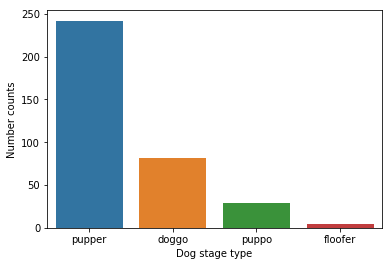

In [108]:
dog_stage_plot = sns.barplot(x = 'dog_stage_type', y = 'count', data = dog_count_df)
dog_stage_plot.set(xlabel='Dog stage type', ylabel='Number counts')
plt.show();

<a id='step0'></a>
## <font color='blue'>Insight 3</font>
The dogs that have the highest favorite and retweet counts both have the same ratings of 1.3 and do not have a name

In [109]:
# Select the dog with the highest favorite counts:
master_clean.favorites_count.nlargest(1)

327    132810
Name: favorites_count, dtype: int64

In [110]:
# Select the dog with the highest retweet counts:
master_clean.retweets_count.nlargest(1)

829    79515
Name: retweets_count, dtype: int64

In [111]:
# See these two dogs in master_clean:
master_clean[master_clean.index.isin([327, 829])]

,tweet_id,timestamp,text,name,ratings,short_url,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets_count,favorites_count
327,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10,None,1.3,https://t.co/nTz3FtorBc,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1.0,lakeland terrier,0.196015,True,labrador retriever,0.160329,True,irish terrier,0.069126,True,48265,132810
829,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad),None,1.3,https://t.co/7wE9LTEXC4,doggo,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1.0,labrador retriever,0.825333,True,ice bear,0.044681,False,whippet,0.018442,True,79515,131075
